<a href="https://colab.research.google.com/github/1364/ML-Mystery-/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" PCA is figuring out the most important features or principal components. The PCA is utilized to reduce features or 
variables without losing key information. PCA is a linear transformation method and Kernel PCA is the extension for Non-Linear data.

Throughout this session the MNIST dataset is utilized for the projection of Kernel PCA and visualization. 

re:https://www.datatechnotes.com/2022/01/kernelpca-projection-example-in-python.html
"""

In [3]:
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from keras.datasets import mnist
import numpy as np
from numpy import reshape
import pandas as pd
import seaborn as sns

In [4]:
(X_train, y_train), (x, y) = mnist.load_data()
X_train.shape # (60000, 28, 28)
y_train.shape # (60000,)
x.shape # (10000, 28, 28)
y.shape # (10000,)
X_train.ndim # 3


11490434/11490434 [==============================] - 0s 0us/step


3

In [5]:
# slicing data for simplicity thus slicing reduces number of rows
x_train = X_train[0:3000,] # (3000, 28, 28)
y_train = y_train[0:3000,] # (3000,)
y_train.shape

(3000,)

In [6]:
# MNIST dataset consist of three dimension--> reduce it to 2 dim. it is simple, shape[0] = 3000, shape[1] = 28, shape[2] = 28
# so multiply 
x_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])
print(x_mnist.shape) # (3000, 784)
print(x_mnist.ndim) # 2

# it remains with 3000 samples with 784 features 

(3000, 784)
2


In [7]:
kernelpca = KernelPCA()
kpca = kernelpca.fit_transform(x_mnist)
# kpca.shape # (3000, 637)

<ipython-input-12-328134c973e8>:8: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "component 1", y = "component 2", hue=df.y.tolist(), palette=sns.color_palette('hls', 6),


[Text(0.5, 1.0, 'MNIST Data kernelPCA projection')]

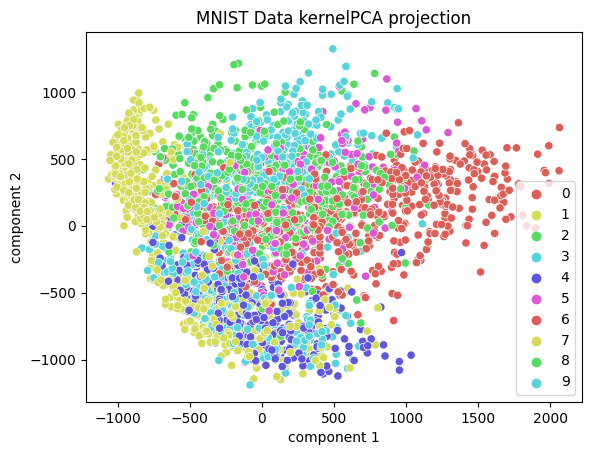

In [12]:
# lets visualize the projection 
df = pd.DataFrame()
df['y'] = y_train
df['component 1'] = kpca[:, 0]
df['component 2'] = kpca[:, 1]
# kpca[:, 0].shape #(3000,)

sns.scatterplot(x = "component 1", y = "component 2", hue=df.y.tolist(), palette=sns.color_palette('hls', 6),
                data = df).set(title = "MNIST Data kernelPCA projection")


In [ ]:
print(df.y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 3000 entries, 0 to 2999
Series name: y
Non-Null Count  Dtype
--------------  -----
3000 non-null   uint8
dtypes: uint8(1)
memory usage: 3.1 KB
None


<ipython-input-15-d6e0e0147a37>:10: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = 'component 1', y = "component 2", hue = df_m.y.tolist(), palette = sns.color_palette('hls', 6),


[Text(0.5, 1.0, 'kernelPCA paramerised')]

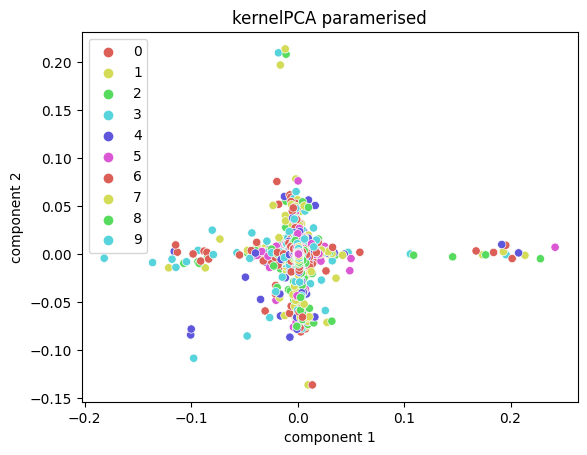

In [15]:
# now lets apply kernel function with defined param, 
kpca_m = KernelPCA(kernel = 'rbf', n_components= 2, gamma = 0.1)
z = kpca_m.fit_transform(x_mnist)

df_m = pd.DataFrame()
df_m['y'] = y_train
df_m["component 1"] = z[:, 0]
df_m["component 2"] = z[:, 1]
# hue param determines which col in dataset is supposed to use for color encoding. 
sns.scatterplot(x = 'component 1', y = "component 2", hue = df_m.y.tolist(), palette = sns.color_palette('hls', 6),
                data = df_m).set(title = "kernelPCA paramerised" )
